In [2]:
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter

**Import Google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 1: Remove empty elements (In some elements of the json file the result is empty, which will be removed)**

In [3]:
# Load the JSON data from the file
file_path = "//content//drive//MyDrive//L-NER Project//data//NER_TRAIN_ALL.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Filter out elements with empty annotations
filtered_data = [item for item in data if item['annotations'][0]['result']]

# Write the filtered data back to the JSON file
filtered_file_path = "//content//drive//MyDrive//L-NER Project//data//1_removed_empty_elements.json"

with open(filtered_file_path, 'w') as file:
    json.dump(filtered_data, file, indent=4)


**Step 2: Removing HTML commands (alongside correctin starts and ends for label values)**

In [4]:
# Remove HTML tags function
def remove_html_tags(text):
    # Create a BeautifulSoup object with the input text
    soup = BeautifulSoup(text, "html.parser")

    # Extract the text from the BeautifulSoup object
    clean_text = soup.get_text()

    return clean_text

# Load the JSON data from the file
file_path = "//content//drive//MyDrive//L-NER Project//data//1_removed_empty_elements.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Filter and process each element in the data
filtered_data = []
edited_data = []

for element in data:
    if 'data' in element and 'text' in element['data']:
        # Get the original text
        original_text = element['data']['text']

        # Remove HTML tags from the 'text' part
        cleaned_text = remove_html_tags(original_text)

        # Check if the text has changed after cleaning HTML tags
        if original_text != cleaned_text:
            # Text has changed, remove the element
            element['data']['text'] = cleaned_text
            edited_data.append(element)

        # If the text remains unchanged, add the element to the filtered data
        else:
            filtered_data.append(element)

for element in edited_data:
    original_text = element['data']['text']
    result = element['annotations'][0]['result']  # Assuming only one annotation per element
    for label_value in result:  # Iterate through all labeled texts in the result
        labeled_text = label_value['value']['text']
        start_idx = original_text.find(labeled_text)
        end_idx = start_idx + len(labeled_text)

        label_value['value']['start'] = start_idx
        label_value['value']['end'] = end_idx

final_data = edited_data + filtered_data

# Write the modified data to a new JSON file
output_file_path = "//content//drive//MyDrive//L-NER Project//data//2_removed_html_commands.json"
with open(output_file_path, 'w') as file:
    json.dump(final_data, file, indent=4)

print("HTML tags removed and elements with text changes removed. Output saved to:", output_file_path)

<ipython-input-4-14a58b889563>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


HTML tags removed and elements with text changes removed. Output saved to: //content//drive//MyDrive//L-NER Project//data//2_removed_html_commands.json


**Step 3: Remove punctuations (Remove unprintable characters from text, pattern  [\n\t\r\f\v]') - alongiside correcting starts and ends**

In [5]:
import json
import re

# Define the function to remove unprintable characters
def remove_unprintable_characters(text):
    pattern = r'[\n\t\r\f\v]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Load your data
input_file_path = "//content//drive//MyDrive//L-NER Project//data//2_removed_html_commands.json"
output_file_path = "//content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json"

# Read the JSON data from the file
with open(input_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Process each element in the data
for element in data:
    # Clean the 'text' field in 'data'
    if 'text' in element['data']:
        element['data']['text'] = remove_unprintable_characters(element['data']['text'])

    # Iterate through all annotations and their results
    if 'annotations' in element and element['annotations']:
        for annotation in element['annotations']:
            if 'result' in annotation:
                for result in annotation['result']:
                    if 'value' in result and 'text' in result['value']:
                        result['value']['text'] = remove_unprintable_characters(result['value']['text'])
                        phrase = result['value']['text']
                        cleaned_text = element['data']['text']
                        result['value']['start'] = cleaned_text.find(phrase)
                        result['value']['end'] = cleaned_text.find(phrase) + len(phrase)

# Write the cleaned data back to a new JSON file
with open(output_file_path, 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

print(f"Cleaned data has been saved to {output_file_path}")


Cleaned data has been saved to //content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json


**Check occurances of each label in data**

In [6]:
import json

# Load the JSON data from the file
file_path = "//content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Create a dictionary to store label counts
label_counts = {}

# Iterate through the data and count labels
for item in data:
    labels = item['annotations'][0]['result']
    for label in labels:
        label_name = label['value']['labels'][0]
        if label_name in label_counts:
            label_counts[label_name] += 1
        else:
            label_counts[label_name] = 1

# Print label counts
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: OTHER_PERSON, Count: 2653
Label: DATE, Count: 1885
Label: GPE, Count: 1398
Label: PROVISION, Count: 2384
Label: STATUTE, Count: 1804
Label: COURT, Count: 1293
Label: ORG, Count: 1441
Label: CASE_NUMBER, Count: 1040
Label: PRECEDENT, Count: 1351
Label: WITNESS, Count: 881
Label: PETITIONER, Count: 464
Label: JUDGE, Count: 567
Label: RESPONDENT, Count: 324


In [7]:
pip install matplotlib

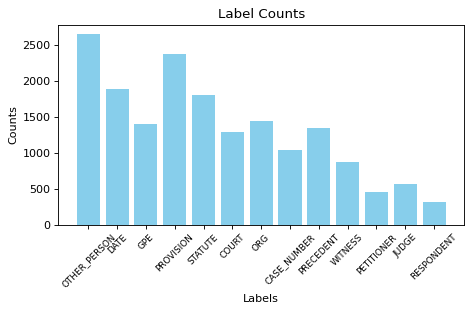

In [8]:
# Load the JSON data from the file
file_path = "//content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Create a dictionary to store label counts
label_counts = {}

# Iterate through the data and count labels
for item in data:
    labels = item['annotations'][0]['result']
    for label in labels:
        label_name = label['value']['labels'][0]
        if label_name in label_counts:
            label_counts[label_name] += 1
        else:
            label_counts[label_name] = 1

# Data for plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Adjust the figure size here, making it smaller
plt.figure(figsize=(6, 4), dpi=80)  # Smaller figure size and DPI

plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels', fontsize=10)  # Reduce the font size
plt.ylabel('Counts', fontsize=10)  # Reduce the font size
plt.title('Label Counts', fontsize=12)  # Reduce the font size
plt.xticks(rotation=45, fontsize=8)  # Reduce the font size and adjust rotation
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

**Plot frequency of label values per element in the json file**

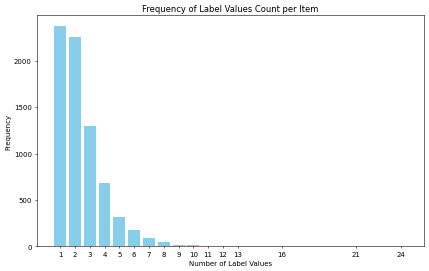

In [9]:
# Load the JSON data from the file
file_path = "//content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Create a list to store the count of label values for each item
label_values_counts = []

# Iterate through the data and count label values
for item in data:
    # Counting the number of label values in each item
    label_count = sum(len(annotation['result']) for annotation in item['annotations'])
    label_values_counts.append(label_count)

# Count the frequency of each label count value
label_count_frequency = Counter(label_values_counts)

# Data for plotting
x_labels = sorted(label_count_frequency.keys())
y_values = [label_count_frequency[x] for x in x_labels]

# Create a vertical bar chart
plt.figure(figsize=(10, 6), dpi=50)
plt.bar(x_labels, y_values, color='skyblue')
plt.xlabel('Number of Label Values')
plt.ylabel('Frequency')
plt.title('Frequency of Label Values Count per Item')
plt.xticks(x_labels)  # Ensure all x-labels are shown

# Show the plot
plt.show()

**Step 4: Add extension (Improve NER Model Performance via Data Augmentation through Paraphrasing of Less Frequent Labels' text)**

**4-1: Installations**

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
import json
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import re
import random

**4-2: Building a function for paraphrasing a text given the presence of label values**

**Function for paraphrasing a given text**

In [14]:
def paraphrase_text(text):

    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)

    # Create a list to hold the paraphrased text
    paraphrased_tokens = []

    # Iterate through tagged tokens
    for token, pos_tag_token in tagged_tokens:
        # Find synonyms for tokens
        synonyms = set()
        for syn in wordnet.synsets(token):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name().replace('_', ' '))

        # Filter synonyms by part of speech
        synonyms_filtered = [syn for syn in synonyms if nltk.pos_tag([syn])[0][1] == pos_tag_token]

        # Add the token if no synonyms found
        if not synonyms_filtered:
            paraphrased_tokens.append(token)
        else:
            # Choose a synonym randomly and add it to the paraphrased text
            paraphrased_tokens.append(synonyms_filtered[0])

    # Convert the paraphrased text list into a string
    paraphrased_text = ' '.join(paraphrased_tokens)
    result = paraphrased_text
    paraphrased_text = ''
    return result

# Example usage
original_text = "On the date of the incident, that is, on 05.09.2008 it must be about 8.45 p.m. that Happy (Tejinder Bawa - appellant in CRA No.1046 of 2011) and Suraj Ahluwalia (appellant in CRA No. D-1026-DB of 2011), President of Shiv Sena, Bal Thakre and his Gunman Shammi Kumar came on a black colour Bolero vehicle bearing registration No. PB-10BE-4979."

paraphrased_text = paraphrase_text(original_text)
print("Original Text:", original_text)
print("Paraphrased Text:", paraphrased_text)


Original Text: On the date of the incident, that is, on 05.09.2008 it must be about 8.45 p.m. that Happy (Tejinder Bawa - appellant in CRA No.1046 of 2011) and Suraj Ahluwalia (appellant in CRA No. D-1026-DB of 2011), President of Shiv Sena, Bal Thakre and his Gunman Shammi Kumar came on a black colour Bolero vehicle bearing registration No. PB-10BE-4979.
Paraphrased Text: along the escort of the incident , that is , along 05.09.2008 it must be about 8.45 P.M. that Happy ( Tejinder Bawa - appellate in CRA No.1046 of 2011 ) and Suraj Ahluwalia ( appellant in CRA No . D-1026-DB of 2011 ) , President of Shiv Sena , Bal Thakre and his Gunman Shammi Kumar came along a opprobrious emblazon Bolero vehicle heading enrolment No . PB-10BE-4979 .


**A function for creating a dictionary from text (Whether it is a label value or not)**

In [15]:
def split_text_with_exceptions_as_dict(text, subtexts):
    # Escape the subtexts to safely use them in a regular expression
    escaped_subtexts = [re.escape(subtext) for subtext in subtexts]
    # Join the subtexts into one regular expression pattern with a capturing group
    pattern = '|'.join(escaped_subtexts)

    # Use re.split but keep the delimiters (subtexts)
    split_text = re.split(f'({pattern})', text)

    # Construct the result with a mix of text and exceptions
    result = []
    for segment in split_text:
        if segment in subtexts:
            # Mark this segment as an exception
            result.append({'exception': segment})
        elif segment:  # Ignore empty strings that might result from consecutive delimiters
            result.append({'text': segment})

    return result

**A function for paraphrasing a text given some exceptions**

In [16]:
def paraphrase_data_texts(text, subtexts):
  text_subtexts_splitted = split_text_with_exceptions_as_dict(text, subtexts)
  for item in text_subtexts_splitted:
    if 'text' in item:
        paraphrased_part = paraphrase_text(item['text'])
        item['text'] = paraphrased_part
        united_text = ''.join(item['text'] if 'text' in item else item['exception'] for item in text_subtexts_splitted)
        return united_text

# Example usage
original_text = "On the date of the incident, that is, on 05.09.2008 it must be about 8.45 p.m. that Happy (Tejinder Bawa - appellant in CRA No.1046 of 2011) and Suraj Ahluwalia (appellant in CRA No. D-1026-DB of 2011), President of Shiv Sena, Bal Thakre and his Gunman Shammi Kumar came on a black colour Bolero vehicle bearing registration No. PB-10BE-4979."
exceptions = ['Tejinder Bawa', 'Suraj Ahluwalia']
print(original_text)
print(paraphrase_data_texts(original_text, exceptions))


On the date of the incident, that is, on 05.09.2008 it must be about 8.45 p.m. that Happy (Tejinder Bawa - appellant in CRA No.1046 of 2011) and Suraj Ahluwalia (appellant in CRA No. D-1026-DB of 2011), President of Shiv Sena, Bal Thakre and his Gunman Shammi Kumar came on a black colour Bolero vehicle bearing registration No. PB-10BE-4979.
along the escort of the incident , that is , along 05.09.2008 it must be about 8.45 P.M. that Happy (Tejinder Bawa - appellant in CRA No.1046 of 2011) and Suraj Ahluwalia (appellant in CRA No. D-1026-DB of 2011), President of Shiv Sena, Bal Thakre and his Gunman Shammi Kumar came on a black colour Bolero vehicle bearing registration No. PB-10BE-4979.


**4-3(Filter): Extracting the data of less occured labels ('JUDGE', 'RESPONDENT', 'PETITIONER')**

Inside each element, if the label values are among these three, it will be extracted. Otherwise, only the label values related to these three labels will be extracted

In [17]:
# Load the JSON data
with open("//content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json", "r") as json_file:
    data = json.load(json_file)

filtered_data = []

# Define the classes to filter
classes_to_keep = ['JUDGE', 'RESPONDENT', 'PETITIONER']

# Iterate through each element in the data
for item in data:
    annotations = item.get('annotations', [])
    filtered_annotations = []

    # Iterate through annotations of each item
    for annotation in annotations:
        results = annotation.get('result', [])

        # Filter label values based on classes_to_keep
        filtered_results = [result for result in results if result['value']['labels'][0] in classes_to_keep]

        # If there are filtered results, add them to filtered_annotations
        if filtered_results:
            annotation['result'] = filtered_results
            filtered_annotations.append(annotation)

    # If there are filtered annotations, add them to filtered_data
    if filtered_annotations:
        item['annotations'] = filtered_annotations
        filtered_data.append(item)

# Save the filtered data to a new JSON file
with open("//content//drive//MyDrive//L-NER Project//data//4A_filtered_label_values.json", "w") as output_file:
    json.dump(filtered_data, output_file, indent=4)

print("Filtered data saved successfully.")


Filtered data saved successfully.


**4-4: Paraphrasing the text of filtered elements**

In [18]:
# Load your JSON file
file_path = "//content//drive//MyDrive//L-NER Project//data//4A_filtered_label_values.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Iterate through each element in the JSON file
for element in data:
    text = element["data"]["text"]
    label_values = []  # Initialize an empty list for label values

    # Extract label values from annotations
    annotations = element['annotations']
    for annotation in annotations:
        labels = annotation['result']
        for label in labels:
            value = label['value']['text']
            label_values.append(value)



    # Paraphrase the text using your custom function
    paraphrased_text = paraphrase_data_texts(text, label_values)

    # Update the text in the JSON data
    element["data"]["text"] = paraphrased_text

# Save the updated JSON data back to the file
with open("//content//drive//MyDrive//L-NER Project//data//4B_paraphrased_elements.json", "w") as file:
    json.dump(data, file, indent=4)

print("Paraphrasing complete. JSON file updated.")


Paraphrasing complete. JSON file updated.


Correcting starts and ends for paraphrased part

In [19]:
# Define the paths to the input and output JSON files
input_file_path = '//content//drive//MyDrive//L-NER Project//data//4B_paraphrased_elements.json'
output_file_path = '//content//drive//MyDrive//L-NER Project//data//4C_corrected_paraphrased_elements.json'

# Function to find the start and end positions of a word within a text
def find_start_and_end(text, word):
    start = text.find(word)
    end = start + len(word)
    return start, end

# Function to correct the start and end positions
def correct_start_end(data):
    text = data['data']['text']
    annotations = data['annotations'][0]['result']  # Assuming there's only one annotation per data

    for annotation in annotations:
        value = annotation['value']
        word = value['text']
        start, end = find_start_and_end(text, word)
        value['start'] = start
        value['end'] = end

# Read the JSON data and correct the start and end positions
with open(input_file_path, 'r') as f:
    json_data = json.load(f)
    for item in json_data:
        correct_start_end(item)

# Save the corrected data to a new JSON file
with open(output_file_path, 'w') as f:
    json.dump(json_data, f, indent=4)

print("Start and end positions corrected and saved successfully.")


Start and end positions corrected and saved successfully.


**4-5: Merging the new paraphrased data with the main data**

In [20]:
#A function for shuffling a list
def shuffle_list(my_list):
    shuffled_list = my_list[:]  # Create a copy of the original list
    random.shuffle(shuffled_list)
    return shuffled_list

input_new_paraphrased_data_path = '//content//drive//MyDrive//L-NER Project//data//4C_corrected_paraphrased_elements.json'
input_main_data_path = "//content//drive//MyDrive//L-NER Project//data//3_removed_punctuations.json"

with open(input_new_paraphrased_data_path, 'r') as f:
    new_data = json.load(f)

with open(input_main_data_path, 'r') as f:
    main_data = json.load(f)

#Merging main and new paraphrased data
final_data = new_data + main_data

#Shuffling the final data
final_data = shuffle_list(final_data)


# Save the corrected data to a new JSON file
with open('//content//drive//MyDrive//L-NER Project//data//4D_final_data.json', 'w') as f:
    json.dump(final_data, f, indent=4)

**4-6: Some statistics after extension**

In [22]:
import json

# Load the JSON data from the file
file_path = '//content//drive//MyDrive//L-NER Project//data//4D_final_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Create a dictionary to store label counts
label_counts = {}

# Iterate through the data and count labels
for item in data:
    labels = item['annotations'][0]['result']
    for label in labels:
        label_name = label['value']['labels'][0]
        if label_name in label_counts:
            label_counts[label_name] += 1
        else:
            label_counts[label_name] = 1

# Print label counts
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: PETITIONER, Count: 928
Label: RESPONDENT, Count: 648
Label: OTHER_PERSON, Count: 2653
Label: COURT, Count: 1293
Label: WITNESS, Count: 881
Label: ORG, Count: 1441
Label: JUDGE, Count: 1134
Label: GPE, Count: 1398
Label: PROVISION, Count: 2384
Label: STATUTE, Count: 1804
Label: DATE, Count: 1885
Label: CASE_NUMBER, Count: 1040
Label: PRECEDENT, Count: 1351


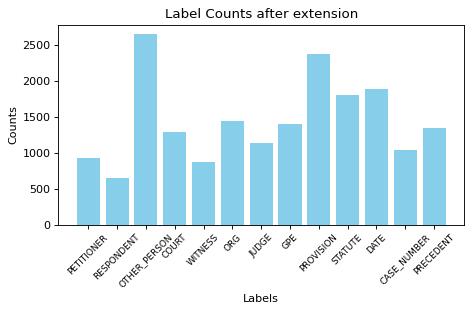

In [23]:
# Load the JSON data from the file
file_path = '//content//drive//MyDrive//L-NER Project//data//4D_final_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Create a dictionary to store label counts
label_counts = {}

# Iterate through the data and count labels
for item in data:
    labels = item['annotations'][0]['result']
    for label in labels:
        label_name = label['value']['labels'][0]
        if label_name in label_counts:
            label_counts[label_name] += 1
        else:
            label_counts[label_name] = 1

# Data for plotting
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Adjust the figure size here, making it smaller
plt.figure(figsize=(6, 4), dpi=80)  # Smaller figure size and DPI

plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels', fontsize=10)  # Reduce the font size
plt.ylabel('Counts', fontsize=10)  # Reduce the font size
plt.title('Label Counts after extension', fontsize=12)  # Reduce the font size
plt.xticks(rotation=45, fontsize=8)  # Reduce the font size and adjust rotation
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

Check if the start and end for label values are true

In [24]:
import json

# Load your JSON data
with open('//content//drive//MyDrive//L-NER Project//data//4D_final_data.json', "r") as file:
    data = json.load(file)

# Iterate through each element in the data
for item in data:
    element_id = item['id']
    # Extract relevant information
    text = item['data']['text']
    annotations = item['annotations']

    # Iterate through annotations
    for annotation in annotations:
        results = annotation['result']
        for result in results:
            # Extract label information
            label = result['value']['text']
            start = result['value']['start']
            end = result['value']['end']

            # Check if the label exists within the text and if start and end positions are correct
            if text[start:end] != label:
                print(f"Element ID: {element_id}")
                print(f"Label '{label}' with start={start} and end={end} is incorrectly annotated in text:")
                print(text)
                print("------")  # Separate each incorrect annotation for clarity


Check if the label exists in the text

In [25]:
import json

# Load your JSON data
with open('//content//drive//MyDrive//L-NER Project//data//4D_final_data.json', "r") as file:
    data = json.load(file)

# Iterate through each element in the data
for item in data:
    element_id = item['id']
    # Extract relevant information
    text = item['data']['text']
    annotations = item['annotations']

    # Iterate through annotations
    for annotation in annotations:
        results = annotation['result']
        for result in results:
            # Extract label information
            label = result['value']['text']
            start = result['value']['start']
            end = result['value']['end']

            # Check if the label exists within the text
            if label not in text:
                print(f"Element ID: {element_id}")
                print(f"Label '{label}' not found in the text.")
